In [416]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric

# Read in the load factor data
df = pd.read_csv('data/load_factor_data.csv')
df

,organization_code_iata,organization_code_icao,period_start_date,period_end_date,accounting_period,passenger_load_factor_pct
0,EI,EIN,2020-07-01,2020-07-31,Month 7,24.696155
1,EI,EIN,2020-08-01,2020-08-31,Month 8,29.712449
2,EI,EIN,2020-09-01,2020-09-30,Month 9,25.965699
3,EI,EIN,2020-10-01,2020-10-31,Month 10,17.795881
4,EI,EIN,2020-11-01,2020-11-30,Month 11,15.954516
...,...,...,...,...,...,...
10263,I8,IZA,2021-10-01,2021-10-31,Month 10,72.100000
10264,WZ,RWZ,2021-10-01,2021-10-31,Month 10,80.900000
10265,FV,SDM,2021-10-01,2021-10-31,Month 10,84.600000
10266,7R,RLU,2021-10-01,2021-10-31,Month 10,73.400000


In [417]:
# Load in validation data
df_val = pd.read_csv('data/validation.csv')

In [418]:
# Airline iata
airline = "R3"

# Filter the data to only include the airline
df = df[df['organization_code_iata'] == airline]
df_val = df_val[df_val['organization_code_iata'] == airline]

# Convert the date column to a datetime object
df['period_start_date'] = pd.to_datetime(df['period_start_date'])
df_val['time'] = pd.to_datetime(df_val['time'])



df

/tmp/ipykernel_6535/636145075.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period_start_date'] = pd.to_datetime(df['period_start_date'])


,organization_code_iata,organization_code_icao,period_start_date,period_end_date,accounting_period,passenger_load_factor_pct
3044,R3,SYL,2020-01-01,2020-01-31,Month 1,61.000000
3045,R3,SYL,2020-02-01,2020-02-29,Month 2,55.300000
3046,R3,SYL,2020-03-01,2020-03-31,Month 3,56.700000
3047,R3,SYL,2020-04-01,2020-04-30,Month 4,40.400000
3048,R3,SYL,2020-05-01,2020-05-31,Month 5,44.000000
3049,R3,SYL,2020-06-01,2020-06-30,Month 6,41.300000
3050,R3,SYL,2020-07-01,2020-07-31,Month 7,58.600000
3051,R3,SYL,2020-08-01,2020-08-31,Month 8,76.700000
3052,R3,SYL,2020-09-01,2020-09-30,Month 9,69.600000
3053,R3,SYL,2020-10-01,2020-10-31,Month 10,60.400000


In [419]:
# Prepare data for Prophet
data = df.reset_index().rename(columns={'period_start_date': 'ds', 'passenger_load_factor_pct': 'y'})
data["covid"] = (data["ds"] >= "2020-03-01") & (data["ds"] <= "2021-6-30")
data['cap'] = 100
data['floor'] = 0
data

,index,organization_code_iata,organization_code_icao,ds,period_end_date,accounting_period,y,covid,cap,floor
0,3044,R3,SYL,2020-01-01,2020-01-31,Month 1,61.000000,False,100,0
1,3045,R3,SYL,2020-02-01,2020-02-29,Month 2,55.300000,False,100,0
2,3046,R3,SYL,2020-03-01,2020-03-31,Month 3,56.700000,True,100,0
3,3047,R3,SYL,2020-04-01,2020-04-30,Month 4,40.400000,True,100,0
4,3048,R3,SYL,2020-05-01,2020-05-31,Month 5,44.000000,True,100,0
5,3049,R3,SYL,2020-06-01,2020-06-30,Month 6,41.300000,True,100,0
6,3050,R3,SYL,2020-07-01,2020-07-31,Month 7,58.600000,True,100,0
7,3051,R3,SYL,2020-08-01,2020-08-31,Month 8,76.700000,True,100,0
8,3052,R3,SYL,2020-09-01,2020-09-30,Month 9,69.600000,True,100,0
9,3053,R3,SYL,2020-10-01,2020-10-31,Month 10,60.400000,True,100,0


20:08:55 - cmdstanpy - INFO - Chain [1] start processing
20:08:55 - cmdstanpy - INFO - Chain [1] done processing


0    64.789600
1    60.100000
2    64.812155
3    68.220709
4    68.650453
5    69.920867
6    70.471569
7    69.038784
8    67.363506
9    66.495841
Name: passenger_load_factor_pct, dtype: float64
0    64.555307
1    64.310524
2    64.088785
3    63.842585
4    63.603632
5    63.356007
6    63.115696
7    62.866690
8    62.616998
9    62.374719
Name: trend, dtype: float64


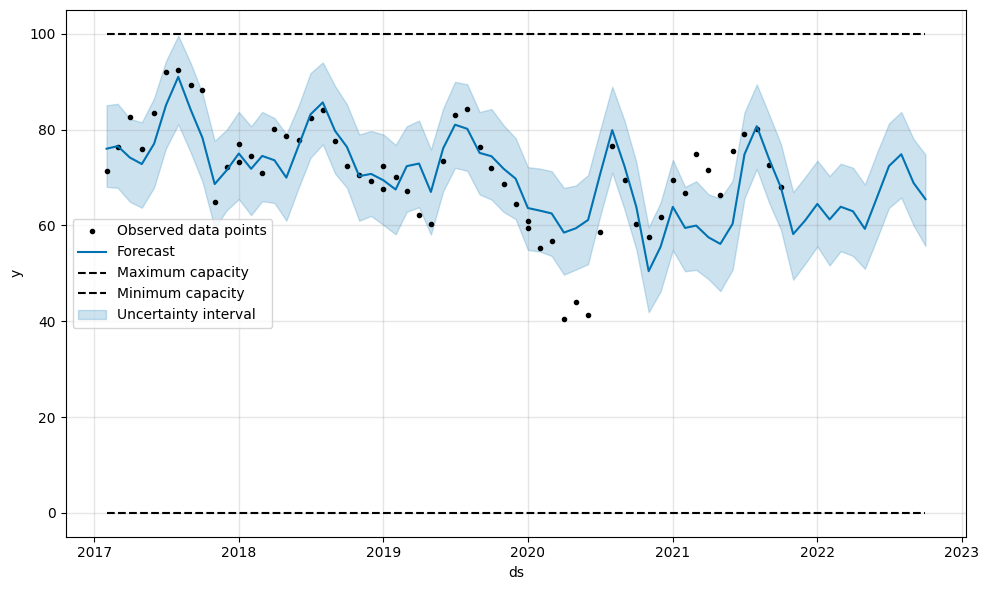

In [420]:
from sklearn.metrics import mean_squared_error

# Fit the model
model = Prophet(growth='logistic')
model.add_regressor("covid")
model.fit(data)

# Make predictions (Data is in 1 month intervals)
future = model.make_future_dataframe(periods=12, freq='MS')
future["covid"] = (future["ds"] >= "2020-03-01") & (future["ds"] <= "2021-6-30")
future['cap'] = 100
future['floor'] = 0



forecast = model.predict(future)

#future = model.make_future_dataframe(periods=365)
#forecast = model.predict(future

# Plot the results
fig = model.plot(forecast, include_legend=True)

# Use sklearn to calculate the MSE for the validation data

# Intersect the validation data with the forecast data
# forecast.ds == df_val.time merge
df_val = df_val.merge(forecast, left_on='time', right_on='ds')

# Calculate the MSE with sklearn
y_actual = df_val['passenger_load_factor_pct']
y_pred = df_val['trend']

print("MSE: ", mean_squared_error(y_actual, y_pred))


In [421]:
#